This problem I found in [Kaggle's 'Digit Recognizer' competition](https://www.kaggle.com/c/digit-recognizer/data)

#### Import some libraries

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from random import randint

#### Import data and set some variables

In [17]:
training_data= pd.read_csv('train.csv')

In [18]:
X=training_data.values[:,1:]
y=(training_data.values[:,0])[:,np.newaxis]

# Find optimal parametrs

<ul>
<li><h4>Here we gonna use onevsall , because we have 10 labels(from 0-9) so it's multiregressional problem<h4></li>
</ul>

In [19]:
def onevsall(X,y,num_labels):
      m,n = X.shape
      out_theta= np.zeros((num_labels,n+1))
      X= np.hstack(  (np.ones((m,1))   ,  X) )
      initial_theta=np.zeros( X.shape[1] )
      #count=0
      for i in range(num_labels):
          #count+=1
          #print('onevsall %s /10   ' %(count))
          new_row =gradientDescent(X,  np.where(y==i,1,0) ,initial_theta, 0.1,800,3 )
          
          out_theta[i,:]=new_row
          
      return out_theta

<ul>
<li><h4>Check global minimum using 'Gradient Descent',so our optimization function will be 'Gradient Descent'<h4></li>
</ul>

In [20]:
def gradientDescent(X,y,theta,alpha,num_iters,Lambda):

    
    #count=0
    for i in range(num_iters):
        #count+=1
        
        #print('im here graddescent. Its   %s   iteration'%(count))
        
        cost, grad = cost_gradient(theta,X,y,3)
        theta = theta - (alpha * grad)
    
    return theta

In [21]:
def cost_gradient(theta,X,y,lambd):
    
    m = y.size
    

    h = sigmoid(X @ (theta.T))
    

    theta[0] = 0
    
    J = (1 / m) * np.sum(  (-y) @ (np.log(h)) - (1 - y) @ (np.log(1 - h))) + (lambd / (2 * m)) * np.sum(np.square(theta))
    
    grad = (1 / m) * ( X.T  @ (h - y) ) 
    grad = grad + (lambd / m) * theta

        
    return J, grad

In [22]:
def sigmoid(z):
    return 1 / ( 1 + np.exp(-z) )

<ul>
<li><h4>To avoid the problem of 'log(0)'<h4></li>
</ul> 

In [23]:
def future_scaling(sigma,mu,x):
    return((x-mu)/sigma)

<ul>
<li><h4>Finding values of theta<h4></li>
</ul> 

In [28]:
def opt_theta(a1,y):
    #print('now am gonna find Theta1')
    theta1=onevsall(a1,y,10)
    a1=np.hstack( (np.ones((a1.shape[0],1))   , a1) )
    a2=sigmoid(a1 @ theta1.T)
    #print('now am gonna find Theta2')
    theta2=onevsall(a2,y,10)
    
    return theta1,theta2

# Set our predict accuracy

In [29]:
def predict(theta1,theta2,X):
    m,n= X.shape[0], X.shape[1]
    
    p= np.zeros((m,1))
    X=np.hstack( (np.ones((m,1))   , X) )
    
    
    a2=sigmoid(X @ theta1.T)
    a2=np.hstack((np.ones((a2.shape[0],1)) , a2  ))
    
    a3= sigmoid(a2 @ theta2.T)
    
    for i in np.arange(m):
        for_picture= a3[i,:]
        put= np.argmax(for_picture)
        p[i]=put
        
    return p

In [30]:
mu=np.mean(X)
sigma=np.std(X)    
X=future_scaling(sigma,mu,X)

In [31]:
y=y.flatten()
theta1,theta2= opt_theta(X,y)

In [66]:
pred =  predict(theta1,theta2,X)
pred=pred.flatten()
print(   "accuracy:" , np.mean((y+1)==pred)    * 100     )

accuracy: 91.74761904761904


## Let's try our parametrs and check how good it works

In [32]:
def disp_image(X):
    
     m,n= X.shape
     
     fig, axis = plt.subplots(m,figsize=(4,4))


     axis.imshow(X.reshape(28,28), cmap="Greys") 
     axis.axis("off")

is it 3.0 ?


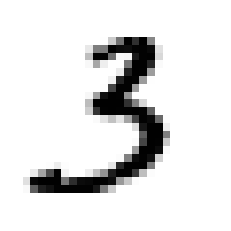

In [57]:
from random import randrange

test_data=pd.read_csv('test.csv')
lets_predict = test_data.values[:,:]

mu=np.mean(lets_predict)
sigma=np.std(lets_predict)

lets_predict=future_scaling(sigma,mu,lets_predict)

num=randrange(0,28001)
X_pred= (lets_predict[num,:])[np.newaxis,:]
disp_image(X_pred)
prd=predict(theta1,theta2,X_pred)
print('is it %s ?' %(prd[0,0])  )